# Задача 1

Реализуйте детектор на основе предобученной модели Faster R-CNN (с backbone, которая там задана по умолчанию). Примените его на своем изображении с выводом названий классов вместо номера.

In [ ]:
import torch
import cv2
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Загружаем предобученную модель
model = fasterrcnn_resnet50_fpn(weights="DEFAULT")
model.eval()

# Список категорий COCO
COCO_CATEGORIES = [
    "__background__", "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
    "traffic light", "fire hydrant", "street sign", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse",
    "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "hat", "backpack", "umbrella", "shoe", "eye glasses", "handbag",
    "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove",
    "skateboard", "surfboard", "tennis racket", "bottle", "plate", "wine glass", "cup", "fork", "knife", "spoon", "bowl",
    "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch",
    "potted plant", "bed", "mirror", "dining table", "window", "desk", "toilet", "door", "tv", "laptop", "mouse",
    "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "blender", "book",
    "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"
]

def detect_objects(image_path, confidence_threshold=0.5):
    """Функция для обнаружения объектов на изображении."""
    image = Image.open(image_path).convert("RGB")
    transform = T.ToTensor()
    image_tensor = transform(image).unsqueeze(0)

    with torch.no_grad():
        outputs = model(image_tensor)

    boxes = outputs[0]['boxes'].cpu().numpy()
    scores = outputs[0]['scores'].cpu().numpy()
    labels = outputs[0]['labels'].cpu().numpy()

    # Фильтрация объектов по порогу уверенности
    valid_mask = scores >= confidence_threshold
    boxes, scores, labels = boxes[valid_mask], scores[valid_mask], labels[valid_mask]

    # Визуализация результатов
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(image)

    for box, score, label in zip(boxes, scores, labels):
        x_min, y_min, x_max, y_max = box
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                 linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        text_label = f"{COCO_CATEGORIES[label]}: {score:.2f}"
        ax.text(x_min, y_min - 5, text_label, color='red', fontsize=12,
                bbox=dict(facecolor='white', alpha=0.5))

    plt.show()


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 140MB/s]


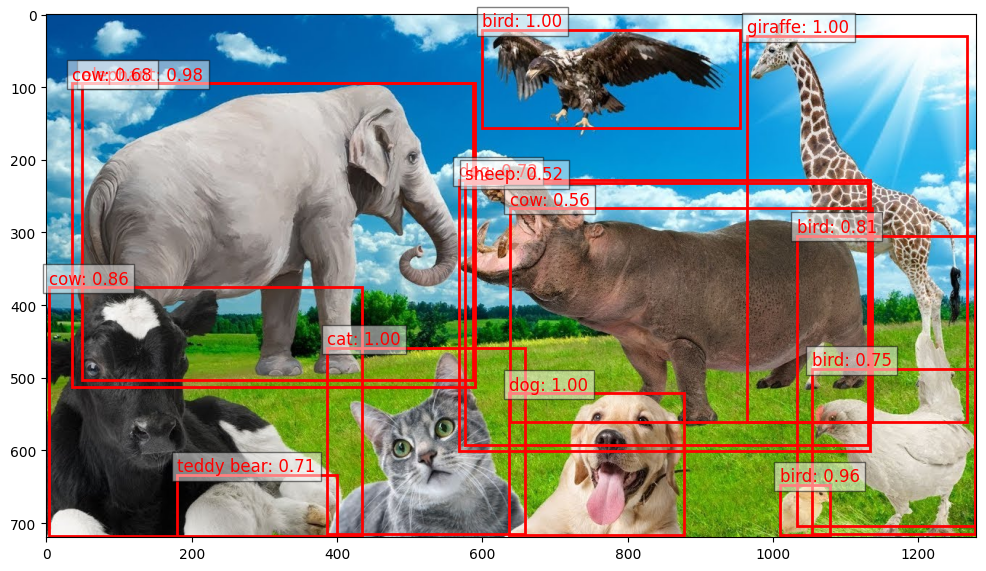

In [ ]:
detect_objects('/content/maxresdefault.jpg')

# Задача 2

Реализуйте детектор на основе предобученной модели Faster R-CNN с mobilenet в качестве backbone. Примените его на своем изображении с выводом названий классов вместо номера.

In [ ]:
from torchvision.models.detection import fasterrcnn_mobilenet_v3_large_fpn

In [ ]:
model = fasterrcnn_mobilenet_v3_large_fpn(weights="DEFAULT")
model.eval()

def detect_objects(image_path, threshold=0.5):
    image = Image.open(image_path).convert("RGB")
    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(image).unsqueeze(0)

    with torch.no_grad():
        predictions = model(img_tensor)

    pred_boxes = predictions[0]['boxes'].cpu().numpy()
    pred_scores = predictions[0]['scores'].cpu().numpy()
    pred_classes = predictions[0]['labels'].cpu().numpy()

    valid_indices = pred_scores >= threshold
    pred_boxes = pred_boxes[valid_indices]
    pred_scores = pred_scores[valid_indices]
    pred_classes = pred_classes[valid_indices]

    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(image)

    for box, score, cls in zip(pred_boxes, pred_scores, pred_classes):
        x_min, y_min, x_max, y_max = box
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                 linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        label = f"{COCO_INSTANCE_CATEGORY_NAMES[cls]}: {score:.2f}"
        ax.text(x_min, y_min - 5, label, color='red', fontsize=12,
                bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth
100%|██████████| 74.2M/74.2M [00:00<00:00, 149MB/s]


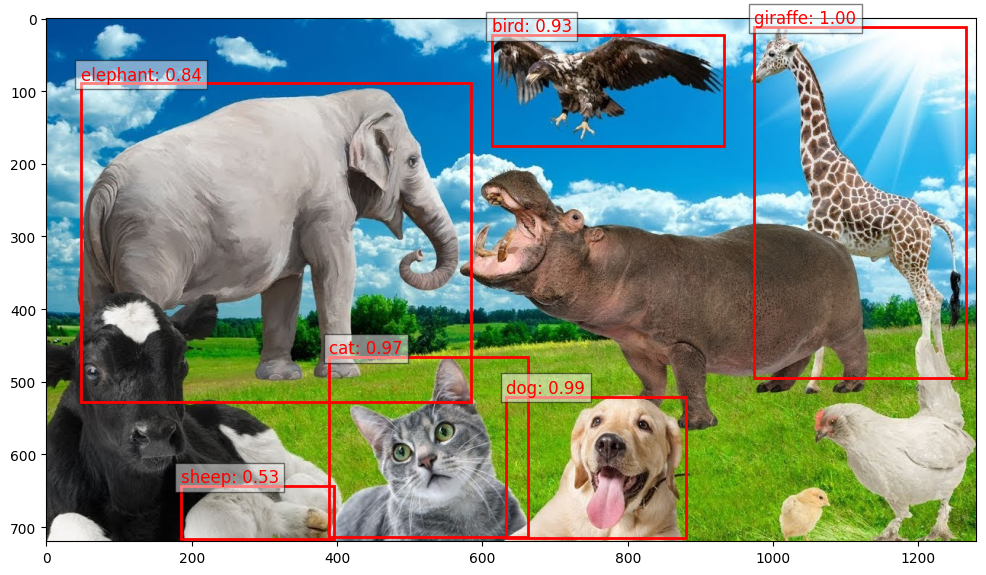

In [ ]:
detect_objects('/content/maxresdefault.jpg')

# Задача 3

Реализуйте детектор на основе предобученной модели YOLO (версию выберите какая вам нравится). Примените его на своем изображении с указанием порога уверенности confidence threshold.

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall


0: 384x640 4 dogs, 1 sheep, 1 elephant, 1 giraffe, 1 sports ball, 313.3ms
Speed: 11.3ms preprocess, 313.3ms inference, 17.0ms postprocess per image at shape (1, 3, 384, 640)


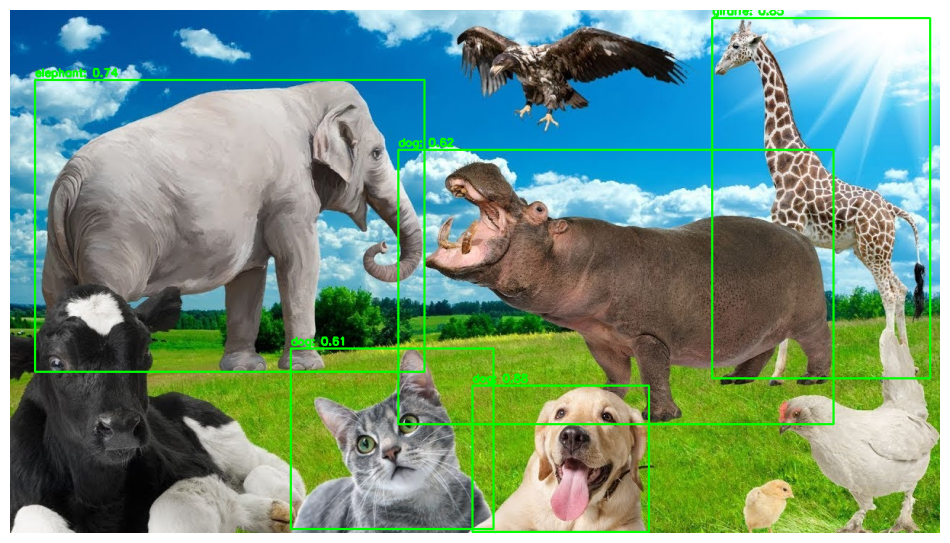

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

def detect_objects(image_path, threshold=0.5):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = model(image_rgb)[0]

    for box in results.boxes:
        x_min, y_min, x_max, y_max = map(int, box.xyxy[0])
        score = float(box.conf[0])
        label = int(box.cls[0])

        if score >= threshold:
            class_name = model.names[label]
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(image, f"{class_name}: {score:.2f}", (x_min, y_min - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()



detect_objects("/content/maxresdefault.jpg", threshold=0.5)